<a href="https://colab.research.google.com/github/Alexanderdivv/my-libOnPython/blob/intro/introOpenCv%2BWatershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
print(cv2.__version__)

4.1.2


In [ ]:
import os

In [ ]:
# looping python
for i in range(1, 3):
  print(i)

1
2


# bash/command line di colab
1. gunakan tanda ! atau % sebagai awalan
2. selebihnya untuk instruksi, gunakan perintah seperti biasa

In [ ]:
!pwd

/content


In [ ]:
# menjadikan gambar menjadi folder untuk ruang kerja. keknya hampir mirip sama cd
os.chdir('gambar')

In [ ]:
os.getcwd()

'/content/gambar'

In [ ]:
os.listdir()

['ss1.png', '.ipynb_checkpoints']

# Contoh 1

In [ ]:
citraRGB = cv2.imread('ss1.png')

In [ ]:
citraAbu2 = cv2.cvtColor(citraRGB, cv2.COLOR_BGR2GRAY)

In [ ]:
from google.colab.patches import cv2_imshow
cv2.imshow('Gambar berwarna', citraRGB)

DisabledFunctionError: ignored

testing

# Watershed

In [ ]:
# import library
import numpy as np
import cv2 as cv

In [ ]:
from matplotlib import pyplot as plt

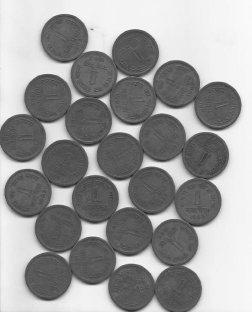

In [ ]:
img = cv.imread('water_coins.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
from google.colab.patches import cv2_imshow
cv2_imshow(gray)

In [ ]:
# 2 parameter (ukuran nilai dan image hasil)
ret, thresh = cv.threshold(gray, 0,255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

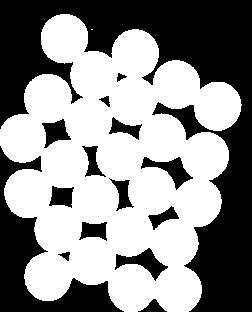

In [ ]:
cv2_imshow(thresh)

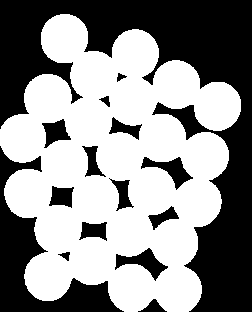

In [ ]:
# morphological opeing to remove small holes
# noise removal 
kernel = np.ones((3,3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations = 2)
cv2_imshow(opening)

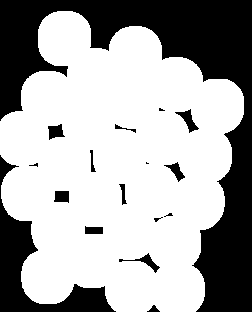

In [ ]:
#sure background area
sure_bg = cv.dilate(opening, kernel, iterations = 3)
cv2_imshow(sure_bg)

In [ ]:
#finding sure foreground area
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
ret, sure_fg = cv.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

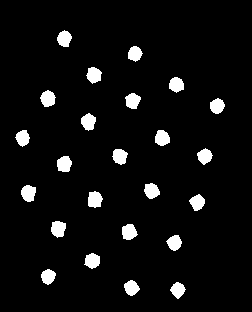

In [ ]:
cv2_imshow(sure_fg)

In [ ]:
# finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)

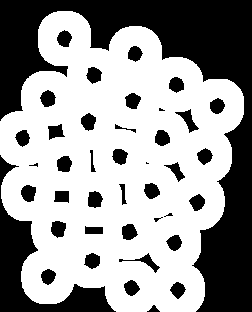

In [ ]:
cv2_imshow(unknown)

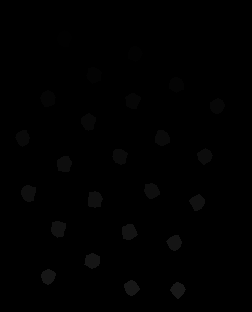

In [ ]:
#marker labeling
ret, markers = cv.connectedComponents(sure_fg)
cv2_imshow(markers)

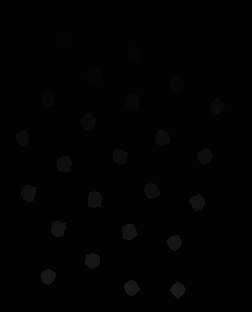

In [ ]:
#add one to all labels so that sure background is not 0, but 1
markers = markers + 1
cv2_imshow(markers)

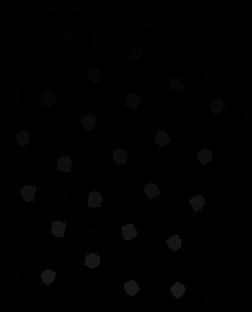

In [ ]:
#now, mark the region of unknown with zero
markers[unknown == 255] = 0
cv2_imshow(markers)

In [ ]:
markers = cv.watershed(img, markers)
img[markers == -1] = [255,0,0]

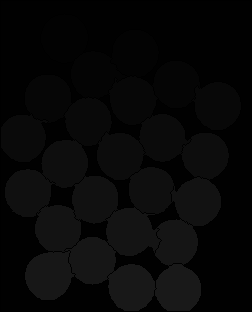

In [ ]:
cv2_imshow(markers)

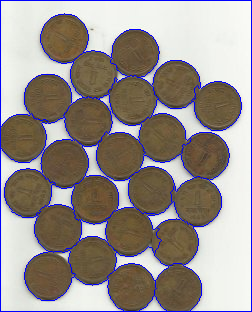

In [ ]:
cv2_imshow(img)


# Watershed 2
source: https://pyimagesearch.com/2015/11/02/watershed-opencv/

In [ ]:
#import library penting
from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import argparse
import imutils
import cv2

In [ ]:
# construct the argument parse and parse the argument
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
                help = "path to input image")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Labeling object

In [ ]:
# import libraries
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


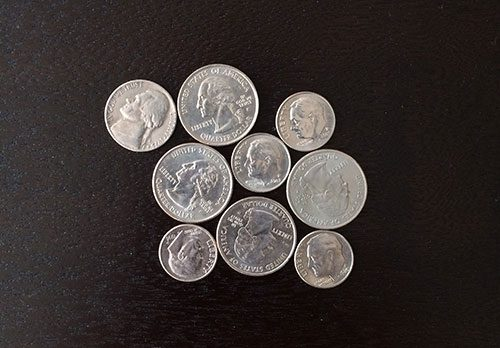

In [ ]:
image = cv2.imread("1.jpg")
cv2_imshow(image)

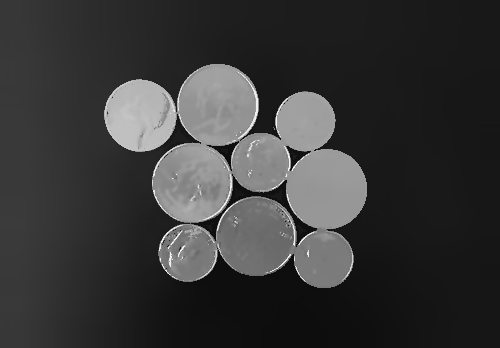

In [ ]:
# image_blur = cv2.medianBlur(image, 1)
shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


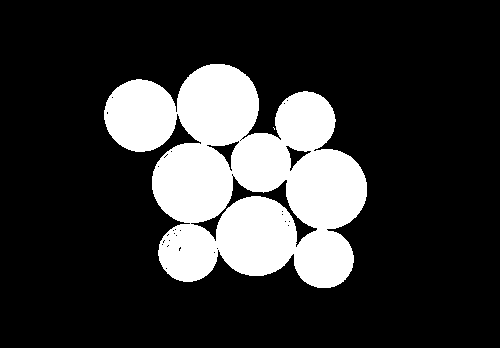

In [ ]:
# image_blur_gray = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)
# cv2_imshow(image_blur_gray)

thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)


In [ ]:
# Unused
# image_res, image_thresh = cv2.threshold(image_blur_gray, 20, 255, cv2.THRESH_BINARY_INV)
# cv2_imshow(image_thresh)


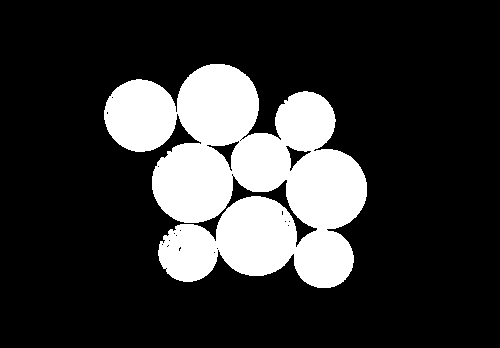

In [ ]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel)
cv2_imshow(opening)

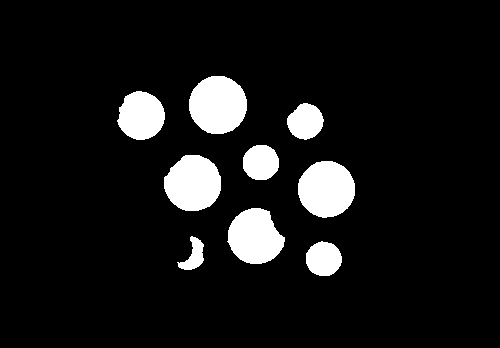

In [ ]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)
cv2_imshow(last_image)

In [ ]:
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


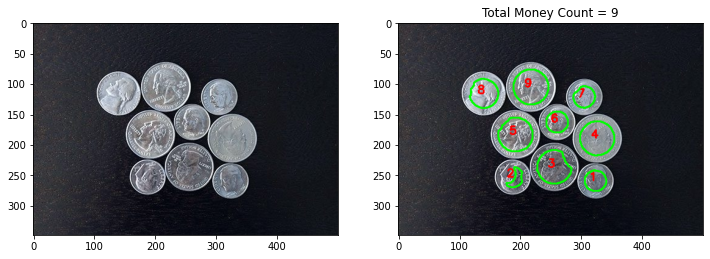

In [ ]:

def display(img,count,cmap="gray"):
    f_image = cv2.imread("1.jpg")
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total Money Count = {}".format(count))

for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
#  Syntax: cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
	cv2.putText(image, "{}".format(i + 1), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

display(image,len(cnts))

# thresholding
source: file di vs code


In [ ]:
import cv2
import numpy as np
from skimage.feature import canny
from scipy import ndimage as ndi
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import math


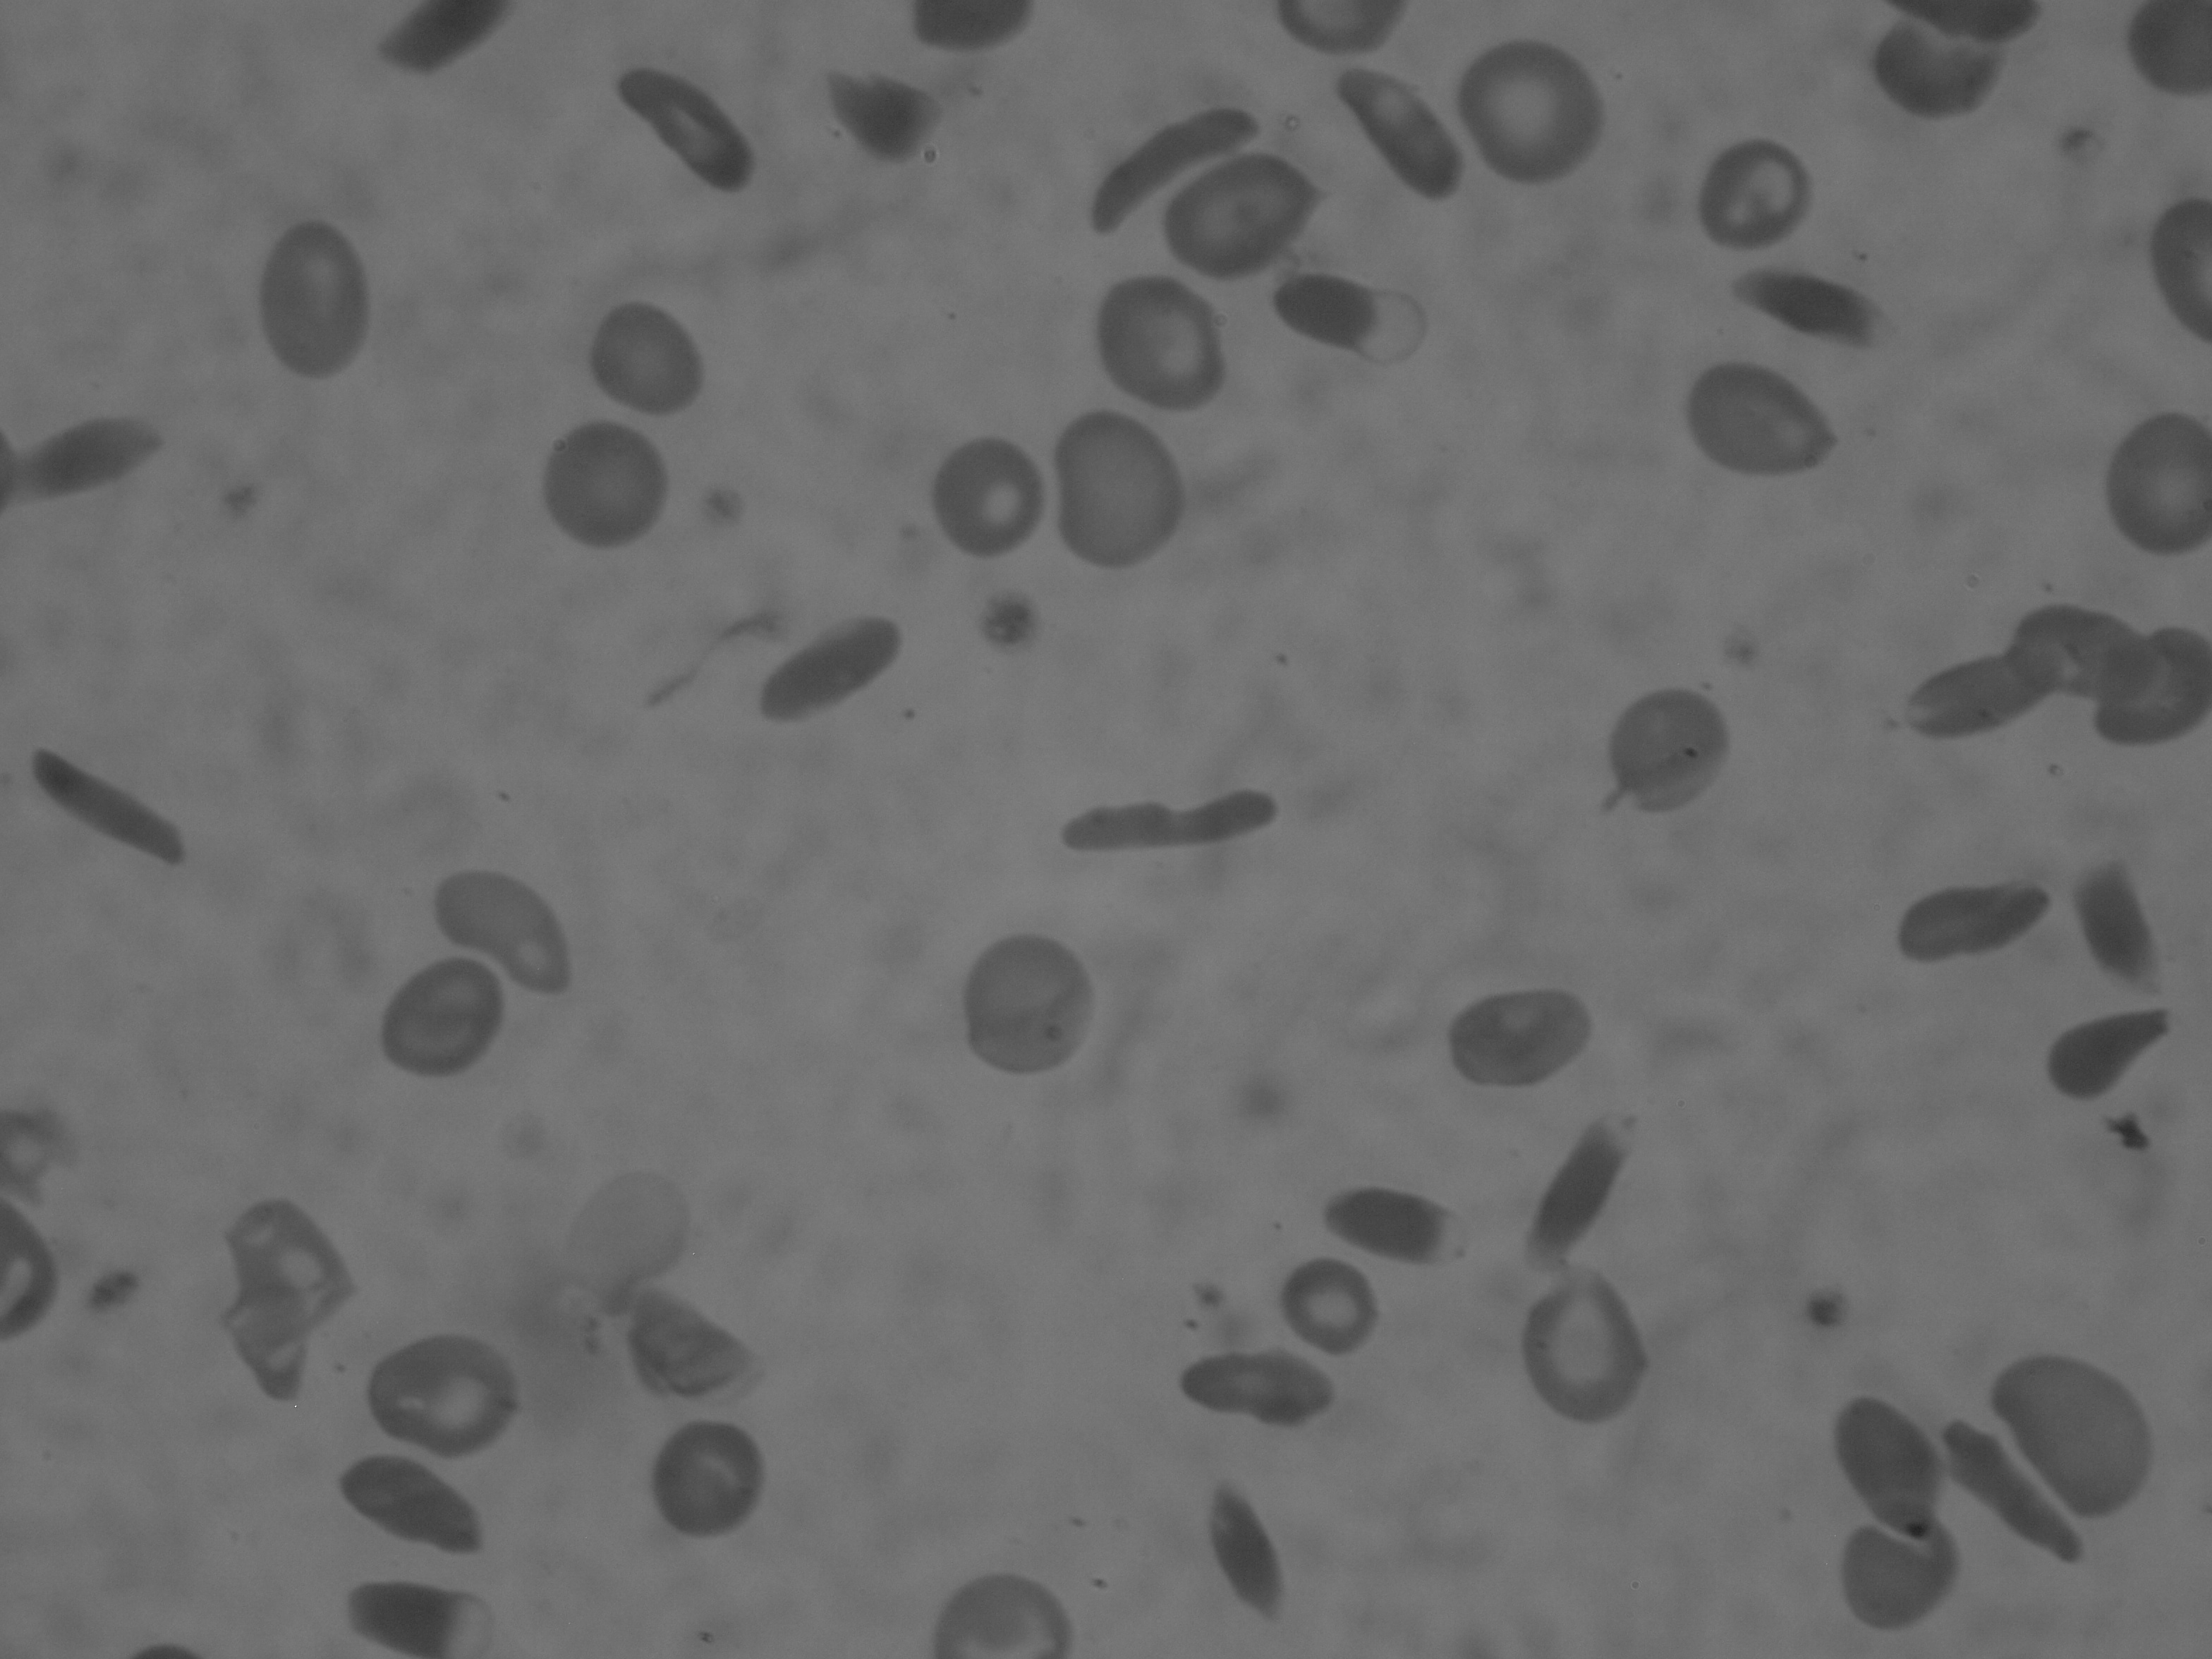

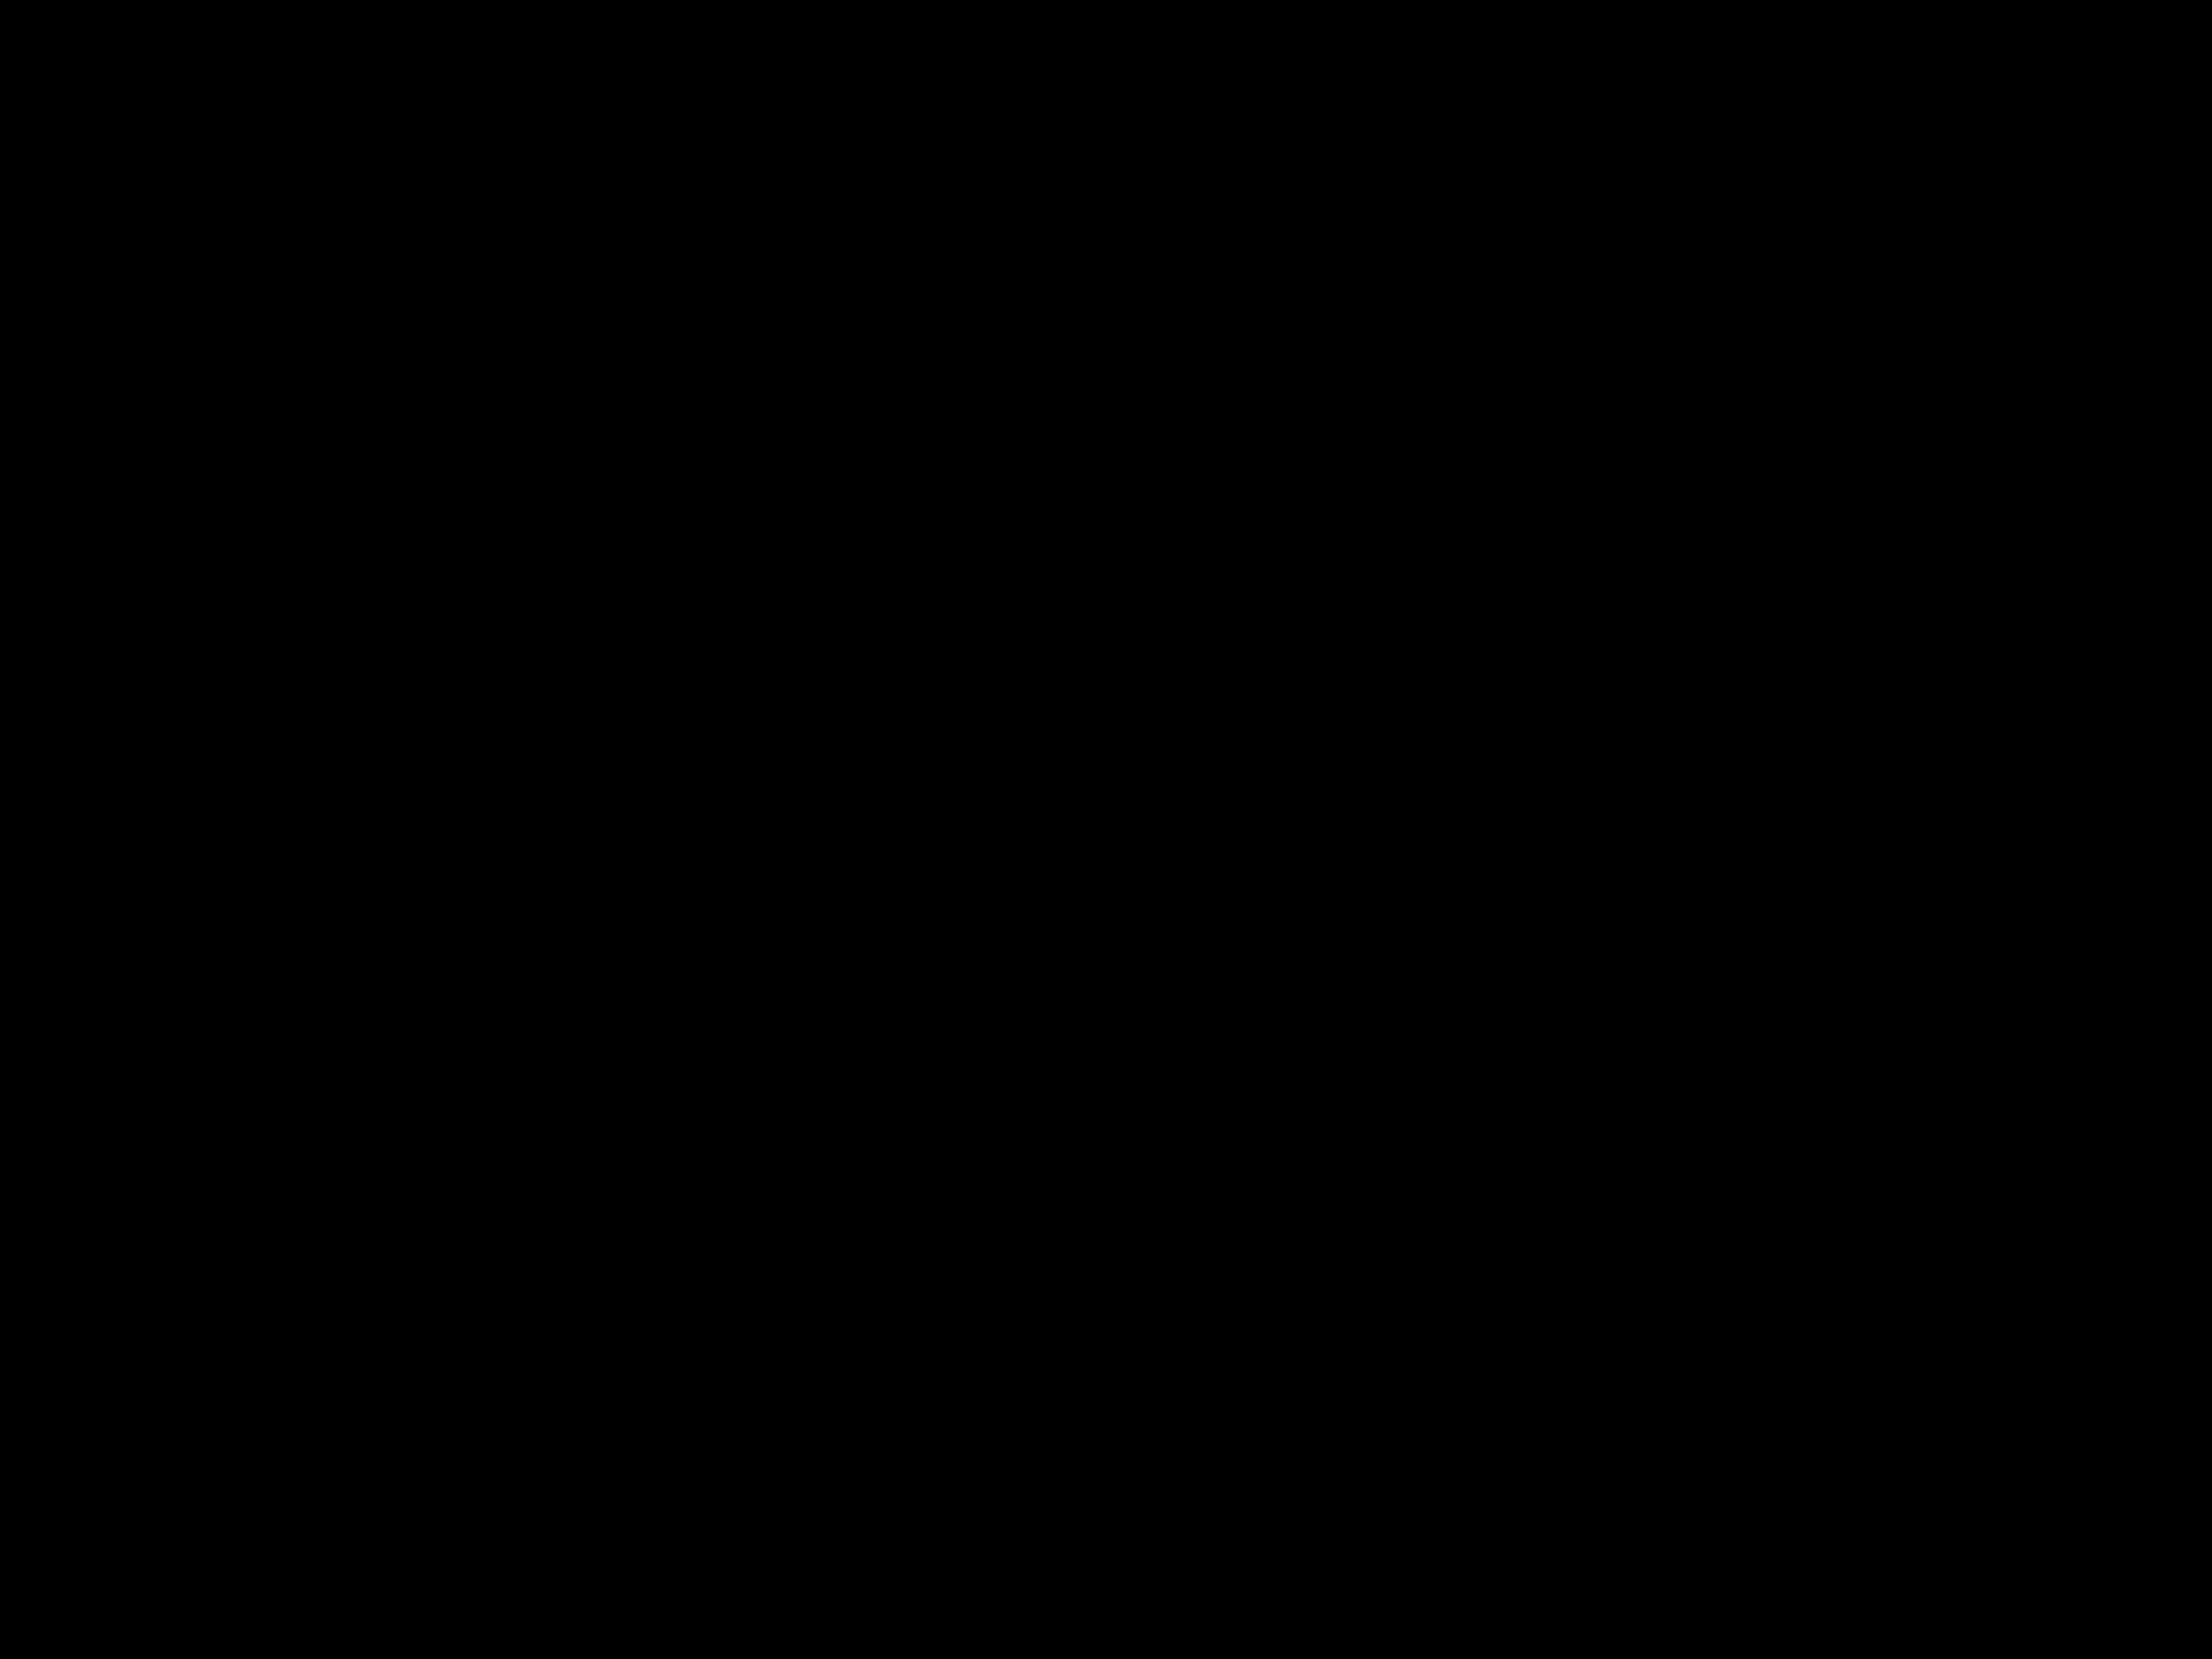

In [ ]:
mask_size = 400
img = cv2.imread("source.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
edges = canny(img/255.)
# cv2_imshow(img/255)
# plt.figure("fill image")
# plt.imshow(img)
fill_img = ndi.binary_fill_holes(edges)
# # cv2_imshow(fill_img)
# plt.figure("fill image")
cv2_imshow(fill_img)
# label_objects, nb_labels = ndi.label(fill_img)
# sizes = np.bincount(label_objects.ravel())
# mask_sizes = sizes > mask_size
# mask_sizes[0] = 0
# img_cleaned = mask_sizes[label_objects]
# labeled_img, num_features = ndi.label(img_cleaned)
# cv2_imshow(labeled_img)

# plt.figure("labeled image")
# plt.imshow(labeled_img)

# Remove Border Components (touching broder)

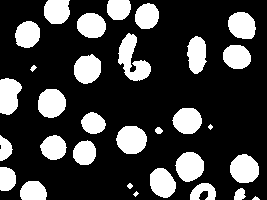

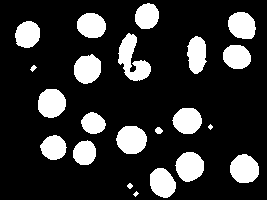

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# read image
img = cv2.imread('segmented.png')
h, w = img.shape[:2]
cv2_imshow(img)
# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# add 1 pixel white border all around
pad = cv2.copyMakeBorder(gray, 1,1,1,1, cv2.BORDER_CONSTANT, value=255)
h, w = pad.shape

# create zeros mask 2 pixels larger in each dimension
mask = np.zeros([h + 2, w + 2], np.uint8)

# floodfill outer white border with black
img_floodfill = cv2.floodFill(pad, mask, (0,0), 0, (5), (0), flags=8)[1]

# remove border
img_floodfill = img_floodfill[1:h-1, 1:w-1]    

# save cropped image
cv2.imwrite('lungs_floodfilled.png',img_floodfill)

# show the images
cv2_imshow(img_floodfill)
cv2.waitKey(0)
cv2.destroyAllWindows()